In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ML/Disease_symptom_and_patient_profile_dataset.csv')

In [3]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [4]:
change_gender = {'Male': 1, 'Female': 0}

df['Male'] = df['Gender'].map(change_gender)
del df['Gender']
df['Female'] = 1 - df['Male']
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Blood Pressure,Cholesterol Level,Outcome Variable,Male,Female
0,Influenza,Yes,No,Yes,Yes,19,Low,Normal,Positive,0,1
1,Common Cold,No,Yes,Yes,No,25,Normal,Normal,Negative,0,1
2,Eczema,No,Yes,Yes,No,25,Normal,Normal,Negative,0,1
3,Asthma,Yes,Yes,No,Yes,25,Normal,Normal,Positive,1,0
4,Asthma,Yes,Yes,No,Yes,25,Normal,Normal,Positive,1,0


In [5]:
change_YN = {'Yes': 1, 'No': 0}

for col in df.columns[1:5]:
  df[col] = df[col].map(change_YN)
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Blood Pressure,Cholesterol Level,Outcome Variable,Male,Female
0,Influenza,1,0,1,1,19,Low,Normal,Positive,0,1
1,Common Cold,0,1,1,0,25,Normal,Normal,Negative,0,1
2,Eczema,0,1,1,0,25,Normal,Normal,Negative,0,1
3,Asthma,1,1,0,1,25,Normal,Normal,Positive,1,0
4,Asthma,1,1,0,1,25,Normal,Normal,Positive,1,0


In [6]:
change_LNH = {'Low': 0, 'Normal': 1, 'High': 2}
for col in df.columns[6:8]:
  df[col] = df[col].map(change_LNH)
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Blood Pressure,Cholesterol Level,Outcome Variable,Male,Female
0,Influenza,1,0,1,1,19,0,1,Positive,0,1
1,Common Cold,0,1,1,0,25,1,1,Negative,0,1
2,Eczema,0,1,1,0,25,1,1,Negative,0,1
3,Asthma,1,1,0,1,25,1,1,Positive,1,0
4,Asthma,1,1,0,1,25,1,1,Positive,1,0


In [7]:
change_PN = {'Positive':1, 'Negative': 0}
df['Outcome Variable'] = df['Outcome Variable'].map(change_PN)
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Blood Pressure,Cholesterol Level,Outcome Variable,Male,Female
0,Influenza,1,0,1,1,19,0,1,1,0,1
1,Common Cold,0,1,1,0,25,1,1,0,0,1
2,Eczema,0,1,1,0,25,1,1,0,0,1
3,Asthma,1,1,0,1,25,1,1,1,1,0
4,Asthma,1,1,0,1,25,1,1,1,1,0


In [8]:
one_hot = pd.get_dummies(df['Disease'])
del df['Disease']
df = df.join(one_hot)
outcomes = df.pop('Outcome Variable')
df.insert(loc=0, column='Outcome Variable', value=outcomes)
df.head()

,Outcome Variable,Fever,Cough,Fatigue,Difficulty Breathing,Age,Blood Pressure,Cholesterol Level,Male,Female,...,Tonsillitis,Tourette Syndrome,Tuberculosis,Turner Syndrome,Typhoid Fever,Ulcerative Colitis,Urinary Tract Infection,Urinary Tract Infection (UTI),Williams Syndrome,Zika Virus
0,1,1,0,1,1,19,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,25,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,25,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,25,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,25,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
def dist(x, y):
  return np.linalg.norm(x-y)

In [10]:
def knn(k, dataset, validset, v_test):
  v2data = [(dist (v_test, dataset.iloc[i, 1:].to_numpy().astype('float64')), i) for i in validset.index]
  sorted_vals = sorted(v2data, key=lambda x: x[0])
  index = [sorted_vals[i][1] for i in range(len(sorted_vals))]
  out = [dataset.loc[i, 'Outcome Variable'] for i in index[:k]]
  return max(out, key=out.count)

In [25]:
valid, test = train_test_split(df, test_size=0.1)

In [26]:
result = [knn(5, df, valid, df.iloc[i, 1:]) for i in test.index]
res_true = [df.loc[i, 'Outcome Variable'] for i in test.index]

## Part A

In [27]:
acc = round(accuracy_score(res_true, result) * 100, 2)
print(f"Accuracy: {acc} %")

Accuracy: 74.29 %


## Part B

In [28]:
fp, tp, treshold = roc_curve(res_true, result)

In [29]:
auc = roc_auc_score(res_true, result)

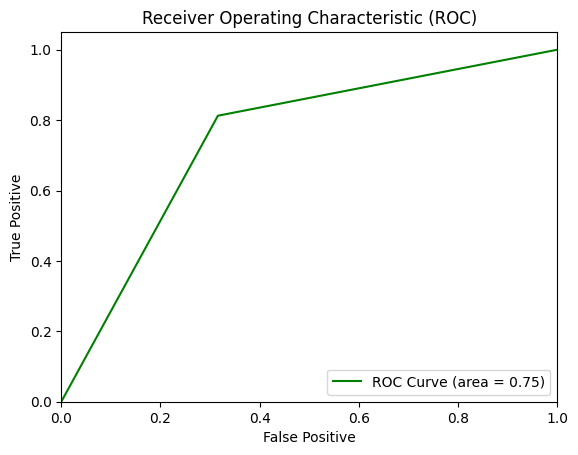

In [30]:
plt.plot(fp, tp, label='ROC Curve (area = %0.2f)' % auc, color='green')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()